In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np

In [47]:
np.random.seed(7)

In [48]:
# number of features used in the regression
window_size = 10
# lstm_num_timesteps
lstm_num_timesteps = 10
# whether to use LSTM or MLP
use_LSTM = False
# lstm_num_features
lstm_num_features = 1

In [219]:
# load the dataset
#df_train = pd.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
df_train = pd.read_csv('108_7_3.train.csv', usecols=[1], engine='python', skipfooter=3)
ts_train = df_train.values
df_test = pd.read_csv('108_7_3.test.csv', usecols=[1], engine='python', skipfooter=3)
ts_test = df_test.values
ts_all = np.append(ts_train, ts_test).reshape(-1,1)
len_overall = len(ts_all)

In [304]:
#for testing
ts_train = np.arange(1,101).reshape(-1,1)  
ts_test = np.arange(101,121).reshape(-1,1)
window_size = 5
ts_all = np.append(ts_train, ts_test).reshape(-1,1)
len_overall = len(ts_all)

In [305]:
len_overall

120

In [306]:
ts_all

array([[  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
      

In [307]:
ts_train.shape, ts_test.shape

((100, 1), (20, 1))

In [308]:
ts_train[:11]

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11]])

In [309]:
ts_test[:11]

array([[101],
       [102],
       [103],
       [104],
       [105],
       [106],
       [107],
       [108],
       [109],
       [110],
       [111]])

In [310]:
# normalize the dataset
#scaler = MinMaxScaler(feature_range=(0, 1))
#ts = scaler.fit_transform(ts)

In [311]:
# split into train and test sets
#train_size = int(len(ts) * 0.67)
#test_size = len(ts) - train_size
#ts_train, ts_test = ts[0:train_size,:], ts[train_size:len(ts),:]
#print(len(ts_train), len(ts_test))


In [312]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, window_size):
    dataX, dataY = [], []
    for i in range(len(dataset) - window_size):
        a = dataset[i:(i + window_size), 0]
        dataX.append(a)
        dataY.append(dataset[i + window_size, 0])
    return np.array(dataX), np.array(dataY)

In [313]:
X_train, y_train = create_dataset(ts_train, window_size)
X_test, y_test = create_dataset(ts_test, window_size)
# the train and test matrices end up shorter than the respective timeseries by window_size + 1!
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((95, 5), (15, 5), (95,), (15,))

In [314]:
X_train[:,:]

array([[ 1,  2,  3,  4,  5],
       [ 2,  3,  4,  5,  6],
       [ 3,  4,  5,  6,  7],
       [ 4,  5,  6,  7,  8],
       [ 5,  6,  7,  8,  9],
       [ 6,  7,  8,  9, 10],
       [ 7,  8,  9, 10, 11],
       [ 8,  9, 10, 11, 12],
       [ 9, 10, 11, 12, 13],
       [10, 11, 12, 13, 14],
       [11, 12, 13, 14, 15],
       [12, 13, 14, 15, 16],
       [13, 14, 15, 16, 17],
       [14, 15, 16, 17, 18],
       [15, 16, 17, 18, 19],
       [16, 17, 18, 19, 20],
       [17, 18, 19, 20, 21],
       [18, 19, 20, 21, 22],
       [19, 20, 21, 22, 23],
       [20, 21, 22, 23, 24],
       [21, 22, 23, 24, 25],
       [22, 23, 24, 25, 26],
       [23, 24, 25, 26, 27],
       [24, 25, 26, 27, 28],
       [25, 26, 27, 28, 29],
       [26, 27, 28, 29, 30],
       [27, 28, 29, 30, 31],
       [28, 29, 30, 31, 32],
       [29, 30, 31, 32, 33],
       [30, 31, 32, 33, 34],
       [31, 32, 33, 34, 35],
       [32, 33, 34, 35, 36],
       [33, 34, 35, 36, 37],
       [34, 35, 36, 37, 38],
       [35, 36

In [315]:
y_train[:]

array([  6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,
        19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,
        32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,
        45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
        58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
        71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100])

In [316]:
X_test

array([[101, 102, 103, 104, 105],
       [102, 103, 104, 105, 106],
       [103, 104, 105, 106, 107],
       [104, 105, 106, 107, 108],
       [105, 106, 107, 108, 109],
       [106, 107, 108, 109, 110],
       [107, 108, 109, 110, 111],
       [108, 109, 110, 111, 112],
       [109, 110, 111, 112, 113],
       [110, 111, 112, 113, 114],
       [111, 112, 113, 114, 115],
       [112, 113, 114, 115, 116],
       [113, 114, 115, 116, 117],
       [114, 115, 116, 117, 118],
       [115, 116, 117, 118, 119]])

In [317]:
y_test

array([106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120])

In [318]:
if use_LSTM:
    # reshape input to be [samples, time steps, features]
    X_train = np.reshape(X_train, (X_train.shape[0], lstm_num_timesteps, lstm_num_features))
    X_test = np.reshape(X_test, (X_test.shape[0], lstm_num_timesteps, lstm_num_features))

In [331]:
model = Sequential()

if use_LSTM:
    model.add(LSTM(4, input_dim=lstm_num_features))
else:
    model.add(Dense(8, input_dim=window_size, activation='relu'))
    
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

if use_LSTM:
    model.fit(X_train, y_train, nb_epoch=10, batch_size=1)
else:
    hist = model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose = 1)

Epoch 1/100
95/95 [==============================] - 0s - loss: 1903.3793     
Epoch 2/100
95/95 [==============================] - 0s - loss: 313.0043     
Epoch 3/100
95/95 [==============================] - 0s - loss: 11.6479     
Epoch 4/100
95/95 [==============================] - 0s - loss: 3.6512     
Epoch 5/100
95/95 [==============================] - 0s - loss: 3.6223     
Epoch 6/100
95/95 [==============================] - 0s - loss: 3.5881     
Epoch 7/100
95/95 [==============================] - 0s - loss: 3.5611     
Epoch 8/100
95/95 [==============================] - 0s - loss: 3.5458     
Epoch 9/100
95/95 [==============================] - 0s - loss: 3.4458     
Epoch 10/100
95/95 [==============================] - 0s - loss: 3.4961     
Epoch 11/100
95/95 [==============================] - 0s - loss: 3.4285     
Epoch 12/100
95/95 [==============================] - 0s - loss: 3.3570     
Epoch 13/100
95/95 [==============================] - 0s - loss: 3.3473     
Ep

In [332]:
hist.params

{'batch_size': 1,
 'do_validation': False,
 'metrics': ['loss'],
 'nb_epoch': 100,
 'nb_sample': 95,
 'verbose': 1}

In [333]:
model.metrics_names, model.metrics_tensors

(['loss'], [])

In [334]:
model.evaluate(X_test, y_test, batch_size = X_test.shape[0])

15/15 [==============================] - 0s


0.00012289897131267935

In [335]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [336]:
y_train[:10],pred_train[:10,0]

(array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 array([  5.9979248 ,   6.99804735,   7.9981699 ,   8.99829292,
          9.99841595,  10.99853897,  11.99866199,  12.99878407,
         13.99890804,  14.99903011], dtype=float32))

In [337]:
y_test[:10],pred_test[:10,0]

(array([106, 107, 108, 109, 110, 111, 112, 113, 114, 115]),
 array([ 106.01021576,  107.0103302 ,  108.0104599 ,  109.0105896 ,
         110.01070404,  111.01082611,  112.01095581,  113.01107025,
         114.01119232,  115.01132965], dtype=float32))

In [338]:
# invert predictions
#pred_train = scaler.inverse_transform(pred_train)
#y_train = scaler.inverse_transform([y_train])
#pred_test = scaler.inverse_transform(pred_test)
#y_test = scaler.inverse_transform([y_test])

# calculate root mean squared error
rsme_train = math.sqrt(mean_squared_error(y_train, pred_train[:,0]))
print('Train Score: %.2f RMSE' % (rsme_train))
rsme_test = math.sqrt(mean_squared_error(y_test, pred_test[:,0]))
print('Test Score: %.2f RMSE' % (rsme_test))

Train Score: 0.01 RMSE
Test Score: 0.01 RMSE


In [339]:
print(len(ts_train), len(pred_train), len(y_train))
len(ts_test), len(pred_test), len(y_test) 

100 95 95


(20, 15, 15)

In [340]:
# shift train predictions for plotting
pred_train_shifted = np.empty_like(ts_all)
print(pred_train_shifted.size)
pred_train_shifted[:, :] = np.nan
# train predictions start at position window_size + 1 (or window_size, if counting from 0)
pred_train_shifted[window_size : len(pred_train) + window_size, :] = pred_train
pred_train_shifted[:]

120


array([[-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [                   5],
       [                   6],
       [                   7],
       [                   8],
       [                   9],
       [                  10],
       [                  11],
       [                  12],
       [                  13],
       [                  14],
       [                  15],
       [                  16],
       [                  17],
       [                  18],
       [                  19],
       [                  20],
       [                  21],
       [                  23],
       [                  24],
       [                  25],
       [                  26],
       [                  27],
       [                  28],
       [                  29],
       [                  30],
       [                  31],
       [                  32],
       [

In [344]:
# shift test predictions for plotting
pred_test_shifted = np.empty_like(ts_all)
pred_test_shifted[:, :] = np.nan
pred_test_shifted[len(pred_train) + (window_size * 2) : len_overall + 1, :] = pred_test
pred_test_shifted[:]

array([[-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [

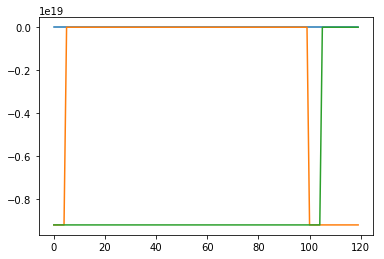

In [343]:
#plt.plot(scaler.inverse_transform(dataset))
plt.plot(ts_all)
#plt.plot(pred_train_shifted)
#plt.plot(pred_test_shifted)
plt.show()